In [1]:
# replot the bias from radstats/cnvstats
# initial built: 2025/02/17

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
root = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/gsidiag/ush/radstats/data/omfstats/'
#exps = ['full_CTRL','full_CTRL_noinf']
#exps = ['full_CTRL','full_only_clr', 'full_clr_cld']
exps = ['full_CTRL','full_only_clr', 'full_clr_cld','full_clr_cld_sym_tri','full_clr_cld_low_sym_tri','full_CTRL_low_sym']

expstr = '-'.join(exps)
instr = ['amsua','atms']

df={};
for ins in instr:
    csvfn = f'{root}/{expstr}/radstats_{ins}.csv'
    df[ins] = pd.read_csv(csvfn)

In [3]:
dftmp={}
for ins in instr:
    dff = df[ins]
    
    if ins == 'amsua':
        plt_chs = [1,2,3,15]
    elif ins == 'atms':
        plt_chs = [1,2,3,16]
        
    plt_rgs = 'GLB'
    dftmp[ins] = dff[ (dff['region']==plt_rgs) & (dff['channel'].isin(plt_chs))]

In [8]:
expref = exps[0]
exptest1 = exps[1]
exptest2 = exps[2]

reflabel = 'CTRL'
testlabel1 = 'CLR'
testlabel2 = 'CLR-CLD'
#testlabel1 = 'CLR-CLD'
#testlabel2 = 'CLR-CLD_SYM'

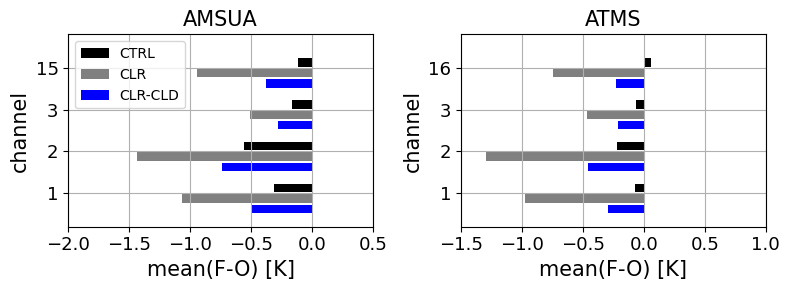

In [9]:
# replot bias-corrected bias(O-F) for selected channels:


plt_var1 = -dftmp['amsua'][f'bias_{expref}']
plt_var2 = -dftmp['amsua'][f'bias_{exptest1}']
plt_var3 = -dftmp['amsua'][f'bias_{exptest2}']

bar_height = 0.25

save_fig = False
fig_dir = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/python_codes/figures/rad_stats_bias/{expstr}/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 1

plt_chs = [1,2,3,15] # AMSUA
x = np.arange(len(plt_chs))

ax1.barh(x + bar_height/2,   plt_var1, height=bar_height*0.8, label=f'{reflabel}', color='black')
ax1.barh(x - bar_height/2,   plt_var2, height=bar_height*0.8, label=f'{testlabel1}', color='gray')
ax1.barh(x - 3*bar_height/2, plt_var3, height=bar_height*0.8, label=f'{testlabel2}', color='blue')

ax1.set_xlabel(r'mean(F-O) [K]', fontsize=15)
ax1.set_yticks([r for r in range(len(plt_chs))], plt_chs, fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.set_xlim([-2.0,0.5])
ax1.set_ylim([-0.8, len(plt_chs)-0.2])
ax1.set_ylabel('channel',fontsize=15)
ax1.grid(True)
ax1.legend(fontsize=10, loc='upper left')
ax1.set_title('AMSUA', fontsize=15)



plt_var1 = -dftmp['atms'][f'bias_{expref}']
plt_var2 = -dftmp['atms'][f'bias_{exptest1}']
plt_var3 = -dftmp['atms'][f'bias_{exptest2}']

plt_chs = [1,2,3,16] # ATMS
ax2.barh(x + bar_height/2,   plt_var1, height=bar_height*0.8, label=f'{reflabel}', color='black')
ax2.barh(x - bar_height/2,   plt_var2, height=bar_height*0.8, label=f'{testlabel1}', color='gray')
ax2.barh(x - 3*bar_height/2, plt_var3, height=bar_height*0.8, label=f'{testlabel2}', color='blue')

ax2.set_xlabel(r'mean(F-O) [K]', fontsize=15)
ax2.set_yticks([r for r in range(len(plt_chs))], plt_chs, fontsize=14)
#ax4.yaxis.tick_right()
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.set_xlim([-1.5, 1.0])
ax2.set_ylim([-0.8, len(plt_chs)-0.2])
ax2.set_ylabel('channel',fontsize=15)
ax2.grid(True)
#ax2.legend(fontsize=10, loc='upper left')
ax2.set_title('ATMS', fontsize=15)

plt.tight_layout()

if save_fig:
    plt.savefig(f"{fig_dir}/window_channels_bias.png", dpi=300, bbox_inches='tight')


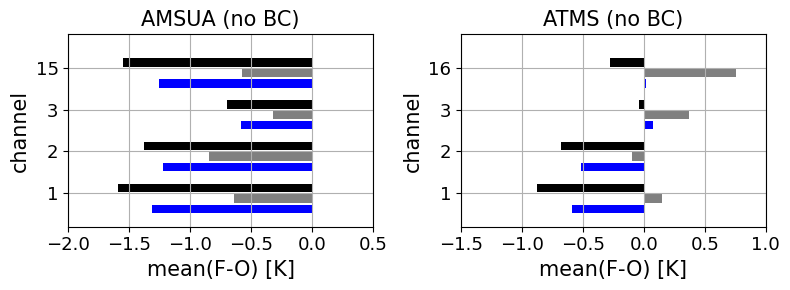

In [10]:
# replot unbias-corrected bias(O-F) for selected channels:


plt_var1 = -dftmp['amsua'][f'biasnbc_{expref}']
plt_var2 = -dftmp['amsua'][f'biasnbc_{exptest1}']
plt_var3 = -dftmp['amsua'][f'biasnbc_{exptest2}']

bar_height = 0.25

save_fig = False
fig_dir = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/python_codes/figures/rad_stats_bias/{expstr}/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 1

plt_chs = [1,2,3,15] # AMSUA
x = np.arange(len(plt_chs))

ax1.barh(x + bar_height/2,   plt_var1, height=bar_height*0.8, label=f'{reflabel}', color='black')
ax1.barh(x - bar_height/2,   plt_var2, height=bar_height*0.8, label=f'{testlabel1}', color='gray')
ax1.barh(x - 3*bar_height/2, plt_var3, height=bar_height*0.8, label=f'{testlabel2}', color='blue')

ax1.set_xlabel(r'mean(F-O) [K]', fontsize=15)
ax1.set_yticks([r for r in range(len(plt_chs))], plt_chs, fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.set_xlim([-2.0,0.5])
ax1.set_ylim([-0.8, len(plt_chs)-0.2])
ax1.set_ylabel('channel',fontsize=15)
ax1.grid(True)
#ax1.legend(fontsize=10, loc='upper left')
ax1.set_title('AMSUA (no BC)', fontsize=15)



plt_var1 = -dftmp['atms'][f'biasnbc_{expref}']
plt_var2 = -dftmp['atms'][f'biasnbc_{exptest1}']
plt_var3 = -dftmp['atms'][f'biasnbc_{exptest2}']

plt_chs = [1,2,3,16] # ATMS
ax2.barh(x + bar_height/2,   plt_var1, height=bar_height*0.8, label=f'{reflabel}', color='black')
ax2.barh(x - bar_height/2,   plt_var2, height=bar_height*0.8, label=f'{testlabel1}', color='gray')
ax2.barh(x - 3*bar_height/2, plt_var3, height=bar_height*0.8, label=f'{testlabel2}', color='blue')

ax2.set_xlabel(r'mean(F-O) [K]', fontsize=15)
ax2.set_yticks([r for r in range(len(plt_chs))], plt_chs, fontsize=14)
#ax4.yaxis.tick_right()
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.set_xlim([-1.5,1.0])
ax2.set_ylim([-0.8, len(plt_chs)-0.2])
ax2.set_ylabel('channel',fontsize=15)
ax2.grid(True)
#ax2.legend(fontsize=10, loc='upper left')
ax2.set_title('ATMS (no BC)', fontsize=15)

plt.tight_layout()

if save_fig:
    plt.savefig(f"{fig_dir}/window_channels_biasnbc.png", dpi=300, bbox_inches='tight')


In [26]:
dftmp['amsua']

,region,channel,count,bias_full_CTRL,bias_full_CTRL_noinf,biasnbc_full_CTRL,biasnbc_full_CTRL_noinf,meanstd_full_CTRL_noinf,ci_full_CTRL_noinf,meanstdnbc_full_CTRL_noinf,cinbc_full_CTRL_noinf
0,GLB,1,20033.702222,0.345468,-0.006163,1.547586,1.841901,97.886068,0.112959,98.708772,0.103106
1,GLB,2,20104.560000,0.604778,0.205426,1.349500,1.523028,98.251390,0.136541,97.844499,0.122923
2,GLB,3,20133.644444,0.171554,-0.055477,0.715435,0.841668,98.102154,0.129996,98.025373,0.117535
13,GLB,15,20086.795556,0.157512,-0.291776,1.541267,1.861614,98.028068,0.112881,98.410840,0.111941


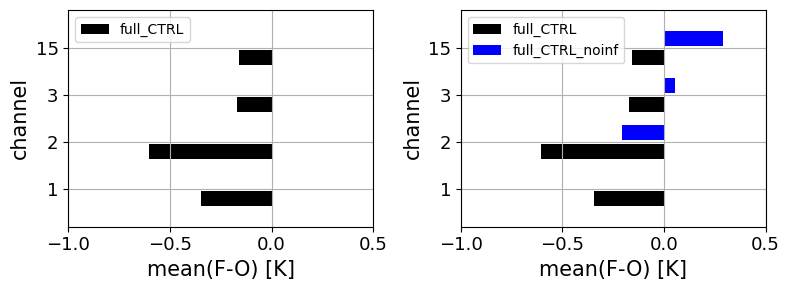

In [101]:
# replot bias(O-F) for selected channels:


plt_var = -dftmp[f'bias_{expref}']
bar_height = 0.4

save_fig = True
fig_dir = f'/home/Chih-Chi.Hu/python_codes/figures/rad_stats/{expstr}/'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print(f"Directory '{fig_dir}' created.")


fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(1, 2, 1)  # Add subplot at position 1
ax2 = fig.add_subplot(1, 2, 2)  # Add subplot at position 1

x = np.arange(len(plt_chs))

ax1.barh(x - bar_height/2, plt_var1, height=bar_height*0.8, label=f'{expref}', color='black')
#ax1.barh([str(ch) for ch in plt_chs], plt_var,  height=bar_height, label=f'{expref}', color='black')
ax1.set_xlabel(r'mean(F-O) [K]', fontsize=15)
ax1.set_yticks([r for r in range(len(plt_chs))], plt_chs, fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.set_xlim([-1.0,0.5])
ax1.set_ylim([-0.8, len(plt_chs)-0.2])
ax1.set_ylabel('channel',fontsize=15)
ax1.grid(True)
ax1.legend(fontsize=10, loc='upper left')
#ax1.set_title('O-F bias (AMSUA window channels)', fontsize=15)


plt_var1 = -dftmp[f'bias_{expref}']
plt_var2 = -dftmp[f'bias_{exptest}']



ax2.barh(x - bar_height/2, plt_var1, height=bar_height*0.8, label=f'{expref}', color='black')
ax2.barh(x + bar_height/2, plt_var2, height=bar_height*0.8, label=f'{exptest}', color='blue')

ax2.set_xlabel(r'mean(F-O) [K]', fontsize=15)
ax2.set_yticks([r for r in range(len(plt_chs))], plt_chs, fontsize=14)
#ax4.yaxis.tick_right()
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.set_xlim([-1.0,0.5])
ax2.set_ylim([-0.8, len(plt_chs)-0.2])
ax2.set_ylabel('channel',fontsize=15)
ax2.grid(True)
ax2.legend(fontsize=10, loc='upper left')
#ax2.set_title('O-F bias (AMSUA window channels)', fontsize=15)

plt.tight_layout()

if save_fig:
    plt.savefig(f"{fig_dir}/{instr}_bias_window_channels.png", dpi=300, bbox_inches='tight')
